[View in Colaboratory](https://colab.research.google.com/github/hadrizia/minicurso-analise-descritiva-dados-abertos/blob/master/CongressistasEDA.ipynb)

# Perfil dos Congressistas em 2014 e 2018
** Autor: Hadrizia Santos** 

Nas eleições de 2018, o Senado Federal teve a maior renovação da história. Estima-se que a cada quatro senadores que tentaram a reeleição em 2018, apenas um conseguiu, acarretando em uma renovação de 85% do Senado. Esta informação pode gerar algumas perguntas sobre esta renovação: 
* Como se deu a renovação dos Deputados Federais da Câmara dos Deputados? 
* Qual é o perfil dos Congressistas que estão no poder hoje?
* Qual é o perfil dos Congressistas eleitos em 2018? Existe alguma melhoria na diversidade quanto à cor e ao gênero, por exemplo? 

In [0]:
import pandas as pd
import io
import requests

url = "https://raw.githubusercontent.com/hadrizia/minicurso-analise-descritiva-dados-abertos/master/data/congressistas-eleitos/eleicoes_2014_e_2018.csv"
s = requests.get(url).content
data = pd.read_csv(io.StringIO(s.decode('utf-8')))

## 1. Como se deu a renovação dos Deputados Federais na Câmara dos Deputados?

In [330]:
# Quantidade de deputados federais eleitos em 2018

deputados_2018 = data.loc[(data['ano'] == 2018) & (data['descricao_cargo'] == 'DEPUTADO FEDERAL')]
deputados_2018.head()

quantidade_deputados_2018 = len(deputados_2018)
print('Número de deputados eleitos em 2018: {}'.format(quantidade_deputados_2018))


# Quantidade de deputados que se reelegeram em 2018

deputados_reeleitos_2018 = data.loc[(data['ano'] == 2018) & (data['descricao_cargo'] == 'DEPUTADO FEDERAL') & (data['descricao_ocupacao'] == 'DEPUTADO')]
deputados_reeleitos_2018.head()

quantidade_deputados_reeleitos_2018 = len(deputados_reeleitos_2018)
print('Número de deputados reeleitos em 2018: {}'.format(quantidade_deputados_reeleitos_2018))


# Taxa de renovacao
taxa_renovacao_camara = quantidade_deputados_reeleitos_2018 / float(quantidade_deputados_2018)
print('Taxa de renovação: {:.2f}'.format(taxa_renovacao_camara))

Número de deputados eleitos em 2018: 513
Número de deputados reeleitos em 2018: 236
Taxa de renovação: 0.46


## 2. Qual é o perfil dos Congressistas que estão no poder hoje?

Considerando os aspectos: sexo e cor_raca

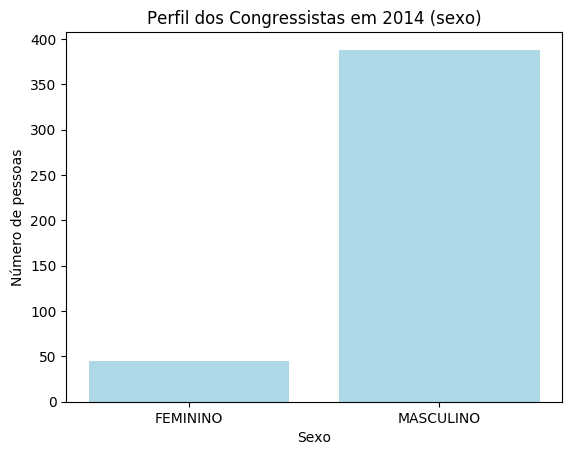

In [326]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

plt.rcdefaults()

congressistas_2014 = data.loc[data['ano'] == 2014]
a = congressistas_2014.groupby(['cor_raca', 'sexo']).size().reset_index(name='count')

fig, ax = plt.subplots()
ax.bar(a['sexo'], a['count'], color='lightblue', linewidth=3)
ax.set(title='Perfil dos Congressistas em 2014 (sexo)', ylabel='Número de pessoas', xlabel='Sexo')

plt.show()


In [0]:
# Separando deputados de senadores
deputados = congressistas_2014.loc[congressistas_2014['descricao_cargo'] == 'DEPUTADO FEDERAL']
senadores = congressistas_2014.loc[congressistas_2014['descricao_cargo'] == 'SENADOR']


# Pegando os valores possíveis de cor_raca
uniq = list(set(data['sexo']))

# Definindo paleta de cores
palette = plt.get_cmap('Set2') # Paletas disponíveis: https://matplotlib.org/gallery/color/colormap_reference.html

# Fazendo a cor casar com o número de valores de raça
cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=palette)

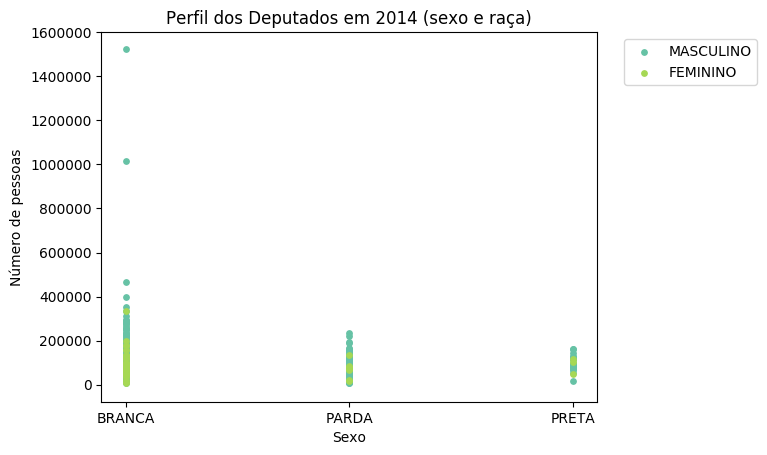

In [328]:
## PLOTANDO DEPUTADOS

fig, ax = plt.subplots()

# Plot cada raça
for i in range(len(uniq)):
    indx = deputados['sexo'] == uniq[i]
    ax.scatter(deputados['cor_raca'][indx], deputados['total_votos'][indx], s=15, color=scalarMap.to_rgba(i), label=uniq[i])

ax.set(title='Perfil dos Deputados em 2014 (sexo e raça)', ylabel='Número de pessoas', xlabel='Sexo') 
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")    
plt.show()

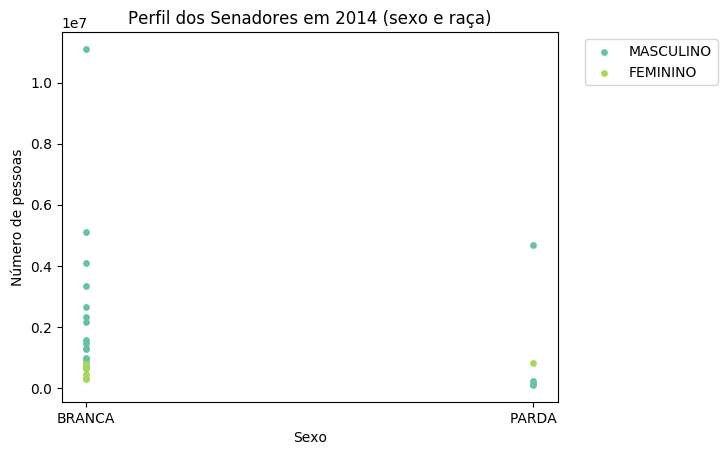

In [329]:
## PLOTANDO SENADORES

fig, ax = plt.subplots()

# Plot cada raça
for i in range(len(uniq)):
    indx = senadores['sexo'] == uniq[i]
    ax.scatter(senadores['cor_raca'][indx], senadores['total_votos'][indx], s=15, color=scalarMap.to_rgba(i), label=uniq[i])
    
ax.set(title='Perfil dos Senadores em 2014 (sexo e raça)', ylabel='Número de pessoas', xlabel='Sexo')

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

## 3. Qual é o perfil dos Congressistas eleitos em 2018? Existe alguma melhoria na diversidade quanto à cor, nacionalidade e ao gênero, por exemplo? 

In [0]:
congressistas_2018 = data.loc[data['ano'] == 2018]

# Separando deputados de senadores
deputados = congressistas_2018.loc[congressistas_2018['descricao_cargo'] == 'DEPUTADO FEDERAL']
senadores = congressistas_2018.loc[congressistas_2018['descricao_cargo'] == 'SENADOR']

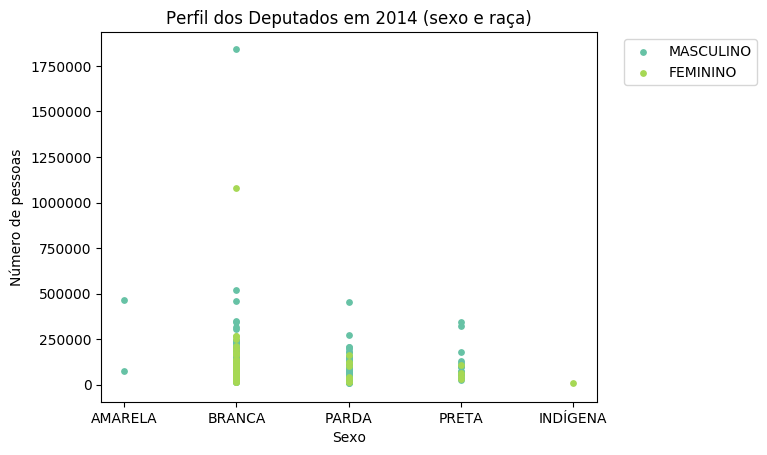

In [323]:
## PLOTANDO DEPUTADOS

fig, ax = plt.subplots()

# Plot cada raça
for i in range(len(uniq)):
    indx = deputados['sexo'] == uniq[i]
    ax.scatter(deputados['cor_raca'][indx], deputados['total_votos'][indx], s=15, color=scalarMap.to_rgba(i), label=uniq[i])

ax.set(title='Perfil dos Deputados em 2014 (sexo e raça)', ylabel='Número de pessoas', xlabel='Sexo') 
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")    
plt.show()

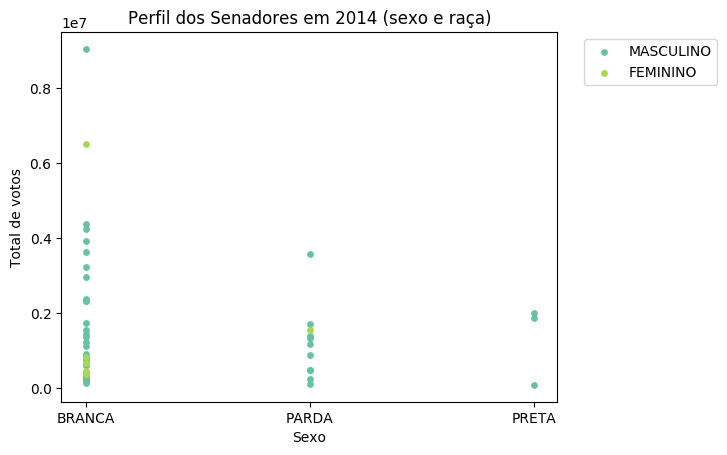

In [325]:
## PLOTANDO SENADORES

fig, ax = plt.subplots()

# Plot cada raça
for i in range(len(uniq)):
    indx = senadores['sexo'] == uniq[i]
    ax.scatter(senadores['cor_raca'][indx], senadores['total_votos'][indx], s=15, color=scalarMap.to_rgba(i), label=uniq[i])
    
ax.set(title='Perfil dos Senadores em 2014 (sexo e raça)', ylabel='Total de votos', xlabel='Sexo')

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()